In [1]:
import pandas as pd
import numpy as np

In [16]:
file_path = r"C:\Users\dahun\P1_DH_Fraud_Detection\PS_1.csv"
df = pd.read_csv(file_path)

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [18]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Get column-wise information
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (6362620, 11)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Missing Values:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [20]:
# Check the distribution of the target variable
print("Class Distribution for 'isFraud':")
print(df['isFraud'].value_counts(normalize=True) * 100)

print("\nClass Distribution for 'isFlaggedFraud':")
print(df['isFlaggedFraud'].value_counts(normalize=True) * 100)

Class Distribution for 'isFraud':
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64

Class Distribution for 'isFlaggedFraud':
isFlaggedFraud
0    99.999749
1     0.000251
Name: proportion, dtype: float64


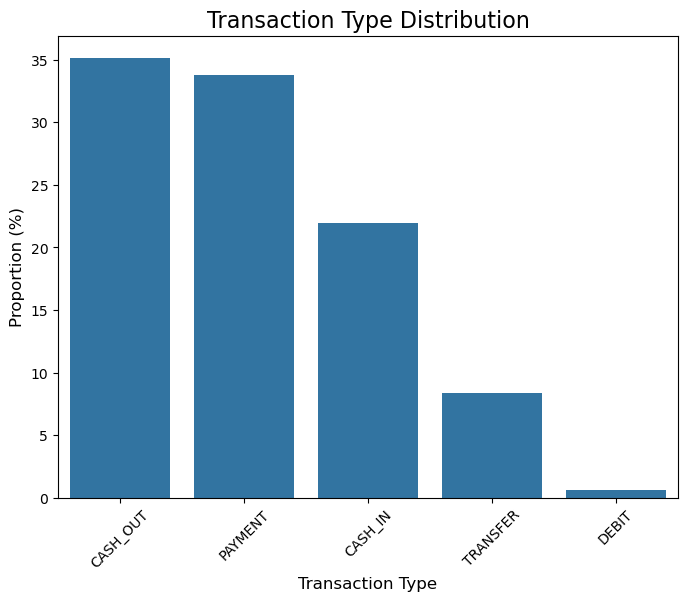

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the distribution of transaction types
type_distribution = df['type'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_distribution.index, y=type_distribution.values)
plt.title("Transaction Type Distribution", fontsize=16)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Proportion (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Fraud Percentage by transaction type:
type
CASH_IN     0.000000
CASH_OUT    0.183955
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.768799
Name: isFraud, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

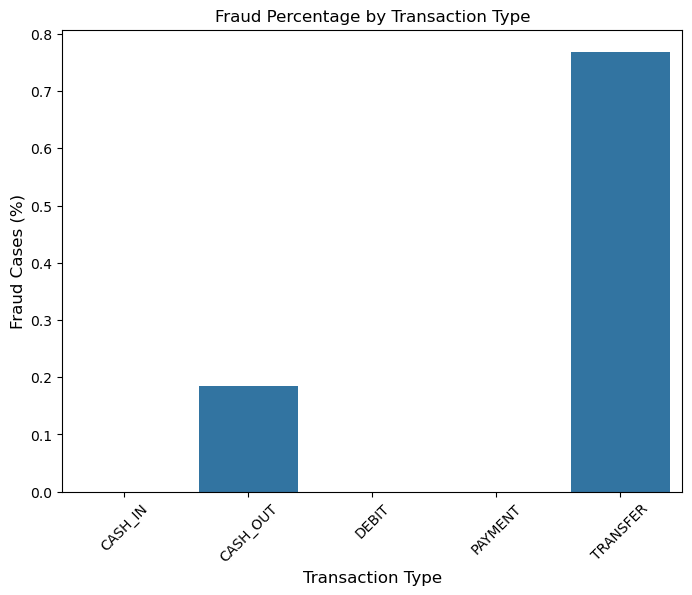

In [30]:
# Calculate fraud percentage per transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean()*100

#display
print("Fraud Percentage by transaction type:")
print(fraud_by_type)

#visualization
plt.figure(figsize=(8,6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values)
plt.title("Fraud Percentage by Transaction Type")
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Fraud Cases (%)", fontsize=12)
plt.xticks(rotation=45)
plt.show

Number of Origin Anomalies are : 5922109
Number of Destination Anomalies are : 5602260
Percentage of Origin Anomalies: 93.0766%
Percentage of Destination Anomalies: 88.0496%

Sample Rows with Origin Anomalies:
   oldbalanceOrg  newbalanceOrig   amount  origin_anomaly
0      170136.00       160296.36  9839.64            True
1       21249.00        19384.72  1864.28            True
5       53860.00        46042.29  7817.71            True
6      183195.00       176087.23  7107.77            True
7      176087.23       168225.59  7861.64            True

Sample Rows with Destination Anomalies:
   oldbalanceDest  newbalanceDest    amount  destination_anomaly
0             0.0             0.0   9839.64                 True
1             0.0             0.0   1864.28                 True
2             0.0             0.0    181.00                 True
3         21182.0             0.0    181.00                 True
4             0.0             0.0  11668.14                 True


<Figure size 800x600 with 0 Axes>

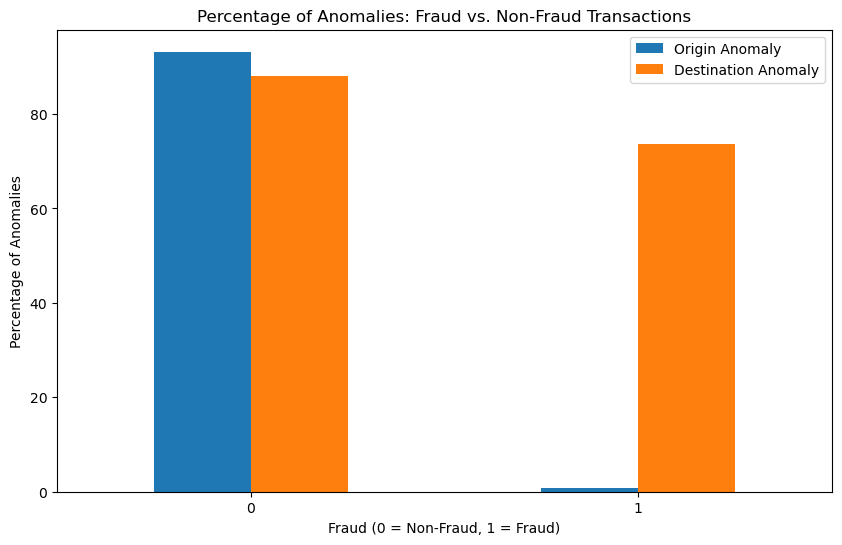

In [56]:
#Calculate balance anomalies for origin and destination
df['origin_anomaly'] = (df['oldbalanceOrg'] - df['newbalanceOrig']) != df['amount']
df['destination_anomaly'] = (df['newbalanceDest'] - df['oldbalanceDest']) != df['amount']

#count anomalies for origin and destination
origin_anomaly_count = df['origin_anomaly'].sum()
destination_anomaly_count = df['destination_anomaly'].sum()

#print the count of anomalies
print(f"Number of Origin Anomalies are : {origin_anomaly_count}")
print(f"Number of Destination Anomalies are : {destination_anomaly_count}")

#percentage of anomalies
print(f"Percentage of Origin Anomalies: {origin_anomaly_count / len(df) * 100:.4f}%")
print(f"Percentage of Destination Anomalies: {destination_anomaly_count / len(df) * 100:.4f}%")

# Display a few rows with anomalies for review
print("\nSample Rows with Origin Anomalies:")
print(df[df['origin_anomaly']][['oldbalanceOrg', 'newbalanceOrig', 'amount', 'origin_anomaly']].head())

print("\nSample Rows with Destination Anomalies:")
print(df[df['destination_anomaly']][['oldbalanceDest', 'newbalanceDest', 'amount', 'destination_anomaly']].head())

# Count anomalies by fraud status
anomalies_by_fraud = df.groupby('isFraud')[['origin_anomaly', 'destination_anomaly']].mean() * 100

# Plot the results
plt.figure(figsize=(8, 6))
anomalies_by_fraud.plot(kind='bar', figsize=(10, 6))
plt.title("Percentage of Anomalies: Fraud vs. Non-Fraud Transactions")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Percentage of Anomalies")
plt.xticks(rotation=0)
plt.legend(["Origin Anomaly", "Destination Anomaly"])
plt.show()

Average Balances for Fraud vs. Non-Fraud Transactions:
         oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
isFraud                                                               
0         8.328287e+05   855970.228109    1.101421e+06    1.224926e+06
1         1.649668e+06   192392.631836    5.442496e+05    1.279708e+06


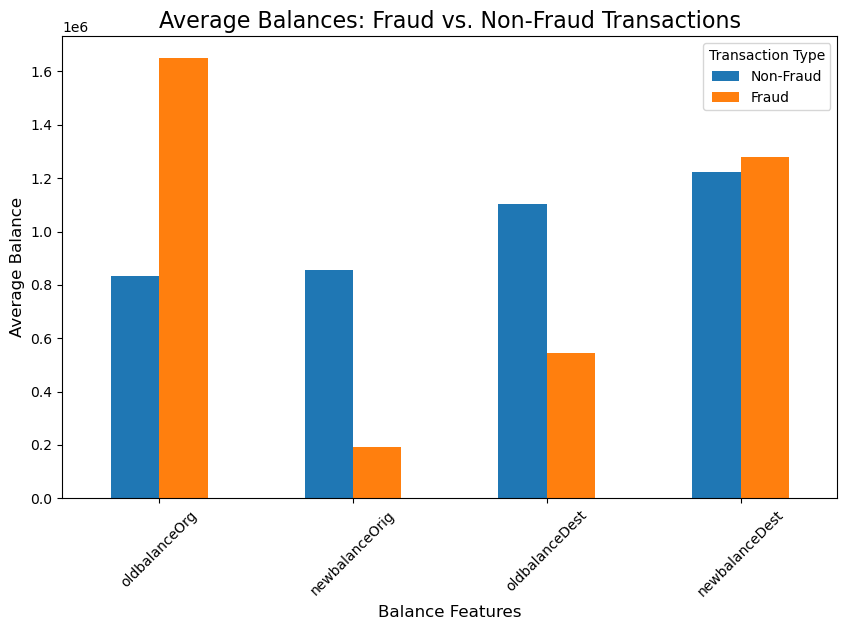

In [46]:
# Calculate average balances for fraud vs. non-fraud transactions
fraud_balances = df.groupby('isFraud')[['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].mean()

# Print the average balance values
print("Average Balances for Fraud vs. Non-Fraud Transactions:")
print(fraud_balances)

# Visualization of balance comparisons
fraud_balances.T.plot(kind='bar', figsize=(10, 6))
plt.title("Average Balances: Fraud vs. Non-Fraud Transactions", fontsize=16)
plt.xlabel("Balance Features", fontsize=12)
plt.ylabel("Average Balance", fontsize=12)
plt.xticks(rotation=45)
plt.legend(["Non-Fraud", "Fraud"], title="Transaction Type")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

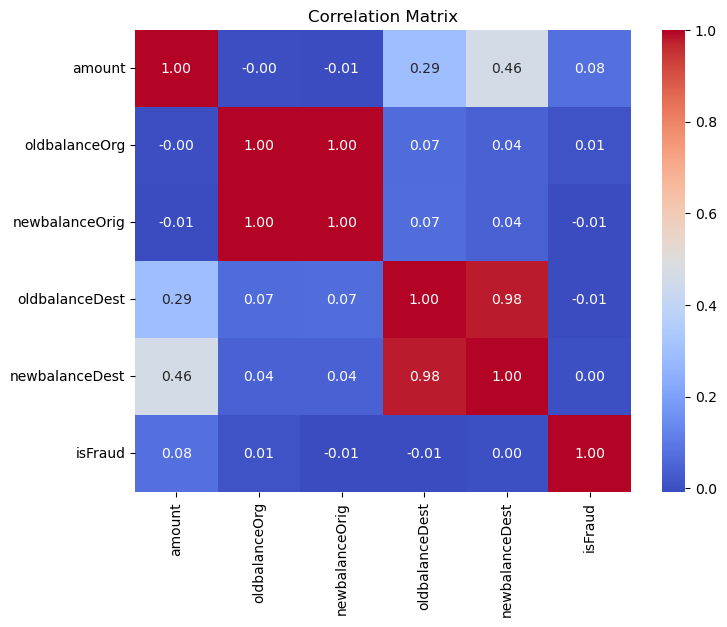

In [60]:
#Corrleation matrix
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()

#plot
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show

In [68]:
# Create new features BEFORE dropping columns
df['balance_diff_orig'] = df['oldbalanceOrg'] - df['amount']
df['balance_diff_dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero

# Drop redundant features AFTER feature creation
df_reduced = df.drop(columns=['newbalanceOrig', 'newbalanceDest'])

# Display a sample of the newly created features
print("Feature-Engineered Data Sample:")
print(df_reduced[['oldbalanceOrg', 'amount', 'balance_diff_orig', 'balance_diff_dest', 'amount_to_balance_ratio']].head())


Feature-Engineered Data Sample:
   oldbalanceOrg    amount  balance_diff_orig  balance_diff_dest  \
0       170136.0   9839.64          160296.36            9839.64   
1        21249.0   1864.28           19384.72            1864.28   
2          181.0    181.00               0.00             181.00   
3          181.0    181.00               0.00           21363.00   
4        41554.0  11668.14           29885.86           11668.14   

   amount_to_balance_ratio  
0                 0.057834  
1                 0.087731  
2                 0.994505  
3                 0.994505  
4                 0.280788  


Average new features for fraud vs non-fraud
         balance_diff_orig  balance_diff_dest  amount_to_balance_ratio
isFraud                                                               
0            654631.670000       54692.231734             70764.320934
1            181700.306571      732509.301069              1161.966671


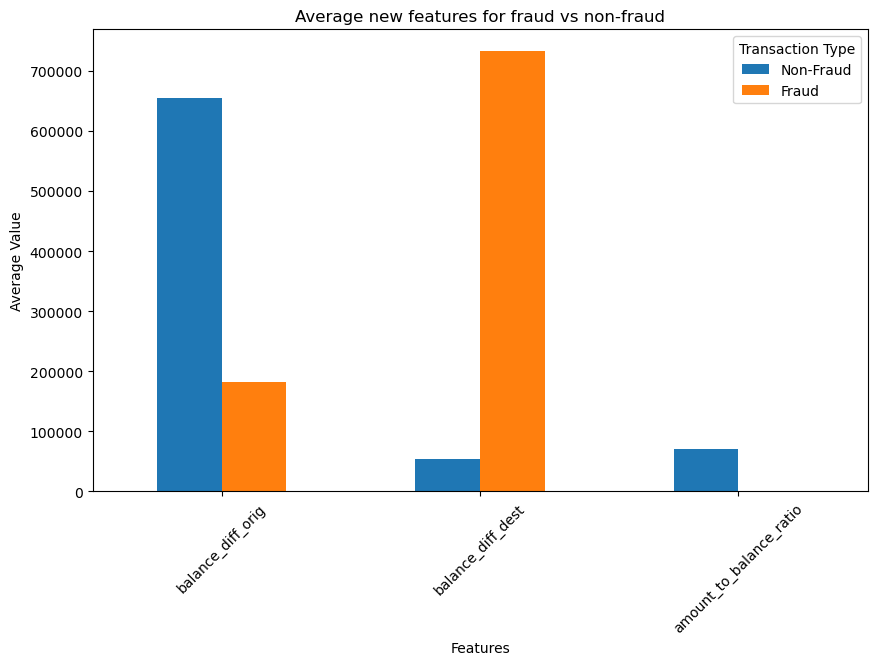

In [70]:
#Group by fraud status and calculate the mean for new features
feature_means = df.groupby('isFraud')[['balance_diff_orig', 'balance_diff_dest', 'amount_to_balance_ratio']].mean()

#Display results
print("Average new features for fraud vs non-fraud")
print(feature_means)

#Visualization
feature_means.T.plot(kind = 'bar', figsize=(10,6))
plt.title("Average new features for fraud vs non-fraud")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.legend(["Non-Fraud", "Fraud"], title="Transaction Type")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Feature selection
features = ['amount', 'balance_diff_orig', 'balance_diff_dest', 'amount_to_balance_ratio', 'type']
target = 'isFraud'

# Create a new DataFrame with selected features
df_model = df[features + [target]].copy()

# Encode categorical feature 'type'
label_encoder = LabelEncoder()
df_model['type'] = label_encoder.fit_transform(df_model['type'])

# Step 2: Define X (features) and y (target variable)
X = df_model.drop(columns=target)
y = df_model[target]

# Step 3: Handle class imbalance using SMOTE
print("Class distribution before SMOTE:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Preparation Complete!")
print(f"Train set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Class distribution before SMOTE:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Class distribution after SMOTE:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64

Data Preparation Complete!
Train set shape: (10167051, 5)
Test set shape: (2541763, 5)
